# Análise Exploratória do Dataset: diabetes-health-indicators-dataset



Base com Undersampling

## Import de Bibliotecas e Pacote

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

## Load dos Dados

In [3]:
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

### Mostrar 5 primeiras linhas com todas as colunas 

In [4]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Entendendo o Dataset

In [5]:
data.shape

(70692, 22)

In [6]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Corrigindo Dtype das colunas

In [8]:
data['Age']=data['Age'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Income']=data['Income'].astype('int64')
data['BMI']=data['BMI'].astype('int64')
data['CholCheck']=data['CholCheck'].astype('int64')
data['Smoker']=data['Smoker'].astype('int64')
data['Stroke']=data['Stroke'].astype('int64')
data['HeartDiseaseorAttack']=data['HeartDiseaseorAttack'].astype('int64')
data['PhysActivity']=data['PhysActivity'].astype('int64')
data['Fruits']=data['Fruits'].astype('int64')
data['Veggies']=data['Veggies'].astype('int64')
data['HvyAlcoholConsump']=data['HvyAlcoholConsump'].astype('int64')
data['AnyHealthcare']=data['AnyHealthcare'].astype('int64')
data['NoDocbcCost']=data['NoDocbcCost'].astype('int64')
data['GenHlth']=data['GenHlth'].astype('int64')
data['MentHlth']=data['MentHlth'].astype('int64')
data['PhysHlth']=data['PhysHlth'].astype('int64')
data['DiffWalk']=data['DiffWalk'].astype('int64')
data['Sex']=data['Sex'].astype('int64')
data['Diabetes_binary']=data['Diabetes_binary'].astype('int64')
data['HighBP']=data['HighBP'].astype('int64')
data['HighChol']=data['HighChol'].astype('int64')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


### Limpeza dos Dados

In [10]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
data.duplicated().sum()

1635

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(69057, 22)

### Organização das Colunas

In [14]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes'})

In [15]:
data=data.reindex(columns=[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])

In [16]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,0,1,26,0,0,0,1,0,1,...,0,3,5,30,0,1,4,6,8,0
1,1,1,1,26,1,1,0,0,1,0,...,0,3,0,0,0,1,12,6,8,0
2,0,0,1,26,0,0,0,1,1,1,...,0,1,0,10,0,1,13,6,8,0
3,1,1,1,28,1,0,0,1,1,1,...,0,3,0,3,0,1,11,6,8,0
4,0,0,1,29,1,0,0,1,1,1,...,0,2,0,0,0,0,8,5,8,0


In [17]:
for col in data.columns:
  print(f"{col} : {data[col].value_counts()}\n")

HighBP : HighBP
1    39447
0    29610
Name: count, dtype: int64

HighChol : HighChol
1    36692
0    32365
Name: count, dtype: int64

CholCheck : CholCheck
1    67317
0     1740
Name: count, dtype: int64

BMI : BMI
27    6118
26    4801
28    4452
30    4282
24    4168
      ... 
85       1
83       1
80       1
78       1
74       1
Name: count, Length: 80, dtype: int64

Smoker : Smoker
0    35776
1    33281
Name: count, dtype: int64

Stroke : Stroke
0    64662
1     4395
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0    58638
1    10419
Name: count, dtype: int64

PhysActivity : PhysActivity
1    48097
0    20960
Name: count, dtype: int64

Fruits : Fruits
1    41825
0    27232
Name: count, dtype: int64

Veggies : Veggies
1    54149
0    14908
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0    66052
1     3005
Name: count, dtype: int64

AnyHealthcare : AnyHealthcare
1    65874
0     3183
Name: count, dtype: int64

NoDocbcCost : NoDocbcCost
0

## Análise dos Dados

### Correlação dos Dados

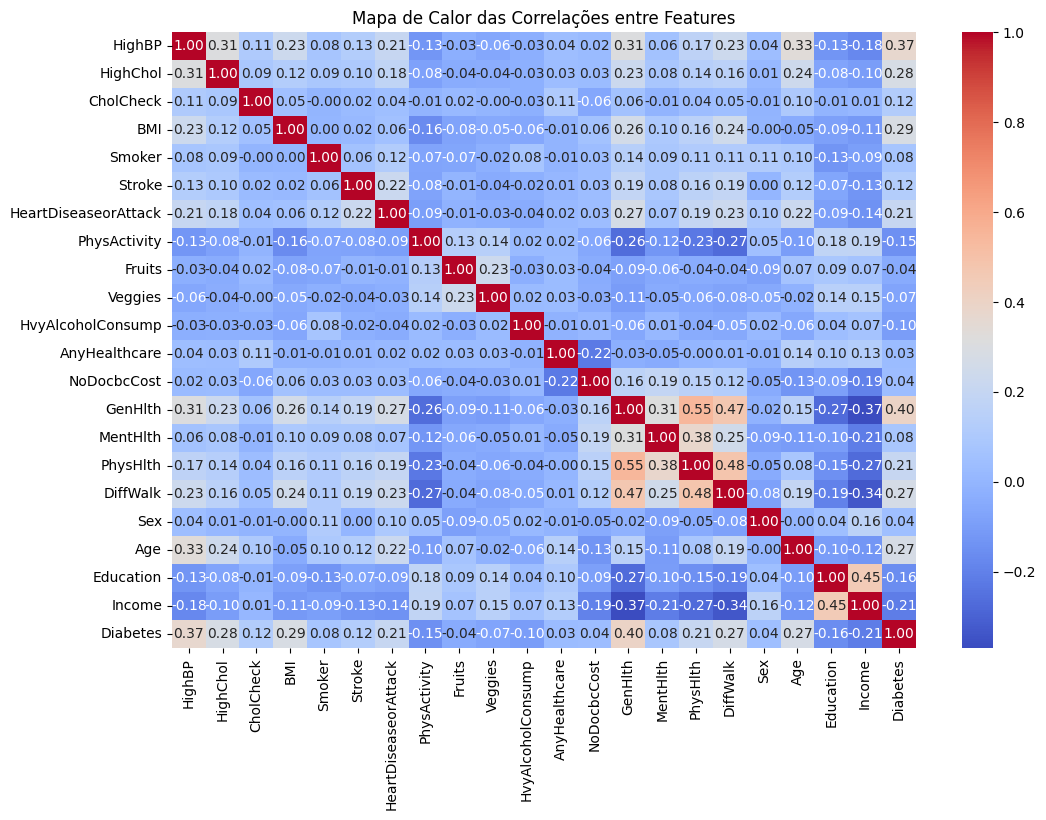

A maior correlação positiva é 0.5501377236767134 entre ('GenHlth', 'PhysHlth').
A maior correlação negativa é -0.3702035964897322 entre ('GenHlth', 'Income').


In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações entre Features')
plt.show()

correlation_matrix = data.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)

max_corr = correlation_matrix.max().max()
max_corr_pair = correlation_matrix.stack().idxmax()

min_corr = correlation_matrix.min().min()
min_corr_pair = correlation_matrix.stack().idxmin()

print(f"A maior correlação positiva é {max_corr} entre {max_corr_pair}.")
print(f"A maior correlação negativa é {min_corr} entre {min_corr_pair}.")


OBSERVAÇÃO -> A correlação negativa entre GenHlth e Income indica que quanto maior a renda, mais baixo a saúde geral. Entretanto, isso se deve a maneira de como os dados estão disponibilizados no nosso Dataset. GenHlth é uma variável categórica ordinal, que varia de 1 a 5. Sendo 1 = Excelente e 5 = Péssima. Por esse motivo a correlação é negativa. Na realidade, os dados nos informam que quanto maior a renda, melhor a saúde geral. 

### Dados Separados por Sexo

In [18]:
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

HighBP                  16752
HighChol                16752
CholCheck               16752
BMI                     16752
Smoker                  16752
Stroke                  16752
HeartDiseaseorAttack    16752
PhysActivity            16752
Fruits                  16752
Veggies                 16752
HvyAlcoholConsump       16752
AnyHealthcare           16752
NoDocbcCost             16752
GenHlth                 16752
MentHlth                16752
PhysHlth                16752
DiffWalk                16752
Sex                     16752
Age                     16752
Education               16752
Income                  16752
Diabetes                16752
dtype: int64

### Frequência de diabetes em homens para diferentes idades

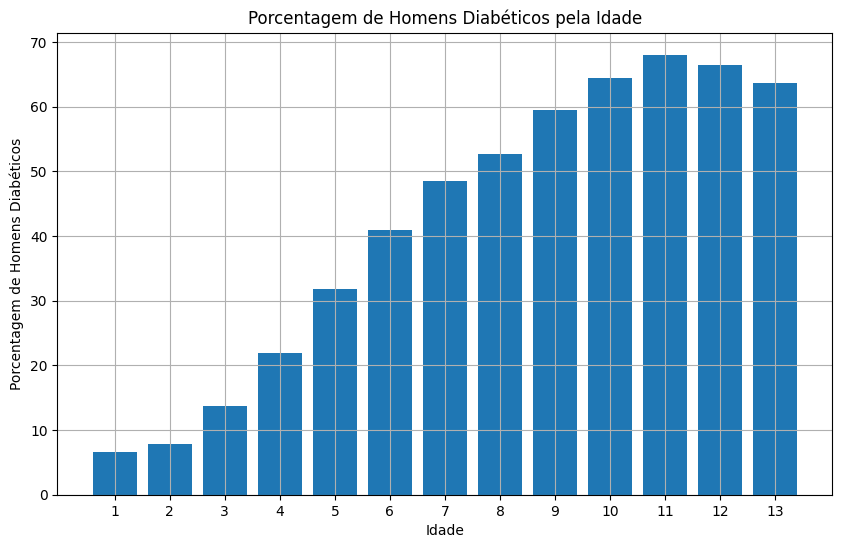

Percentual máximo de homens diabéticos é 68.04% na idade 11.


In [19]:

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Idade')
plt.ylabel('Porcentagem de Homens Diabéticos')
plt.title('Porcentagem de Homens Diabéticos pela Idade')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Percentual máximo de homens diabéticos é {:.2f}% na idade {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))
 

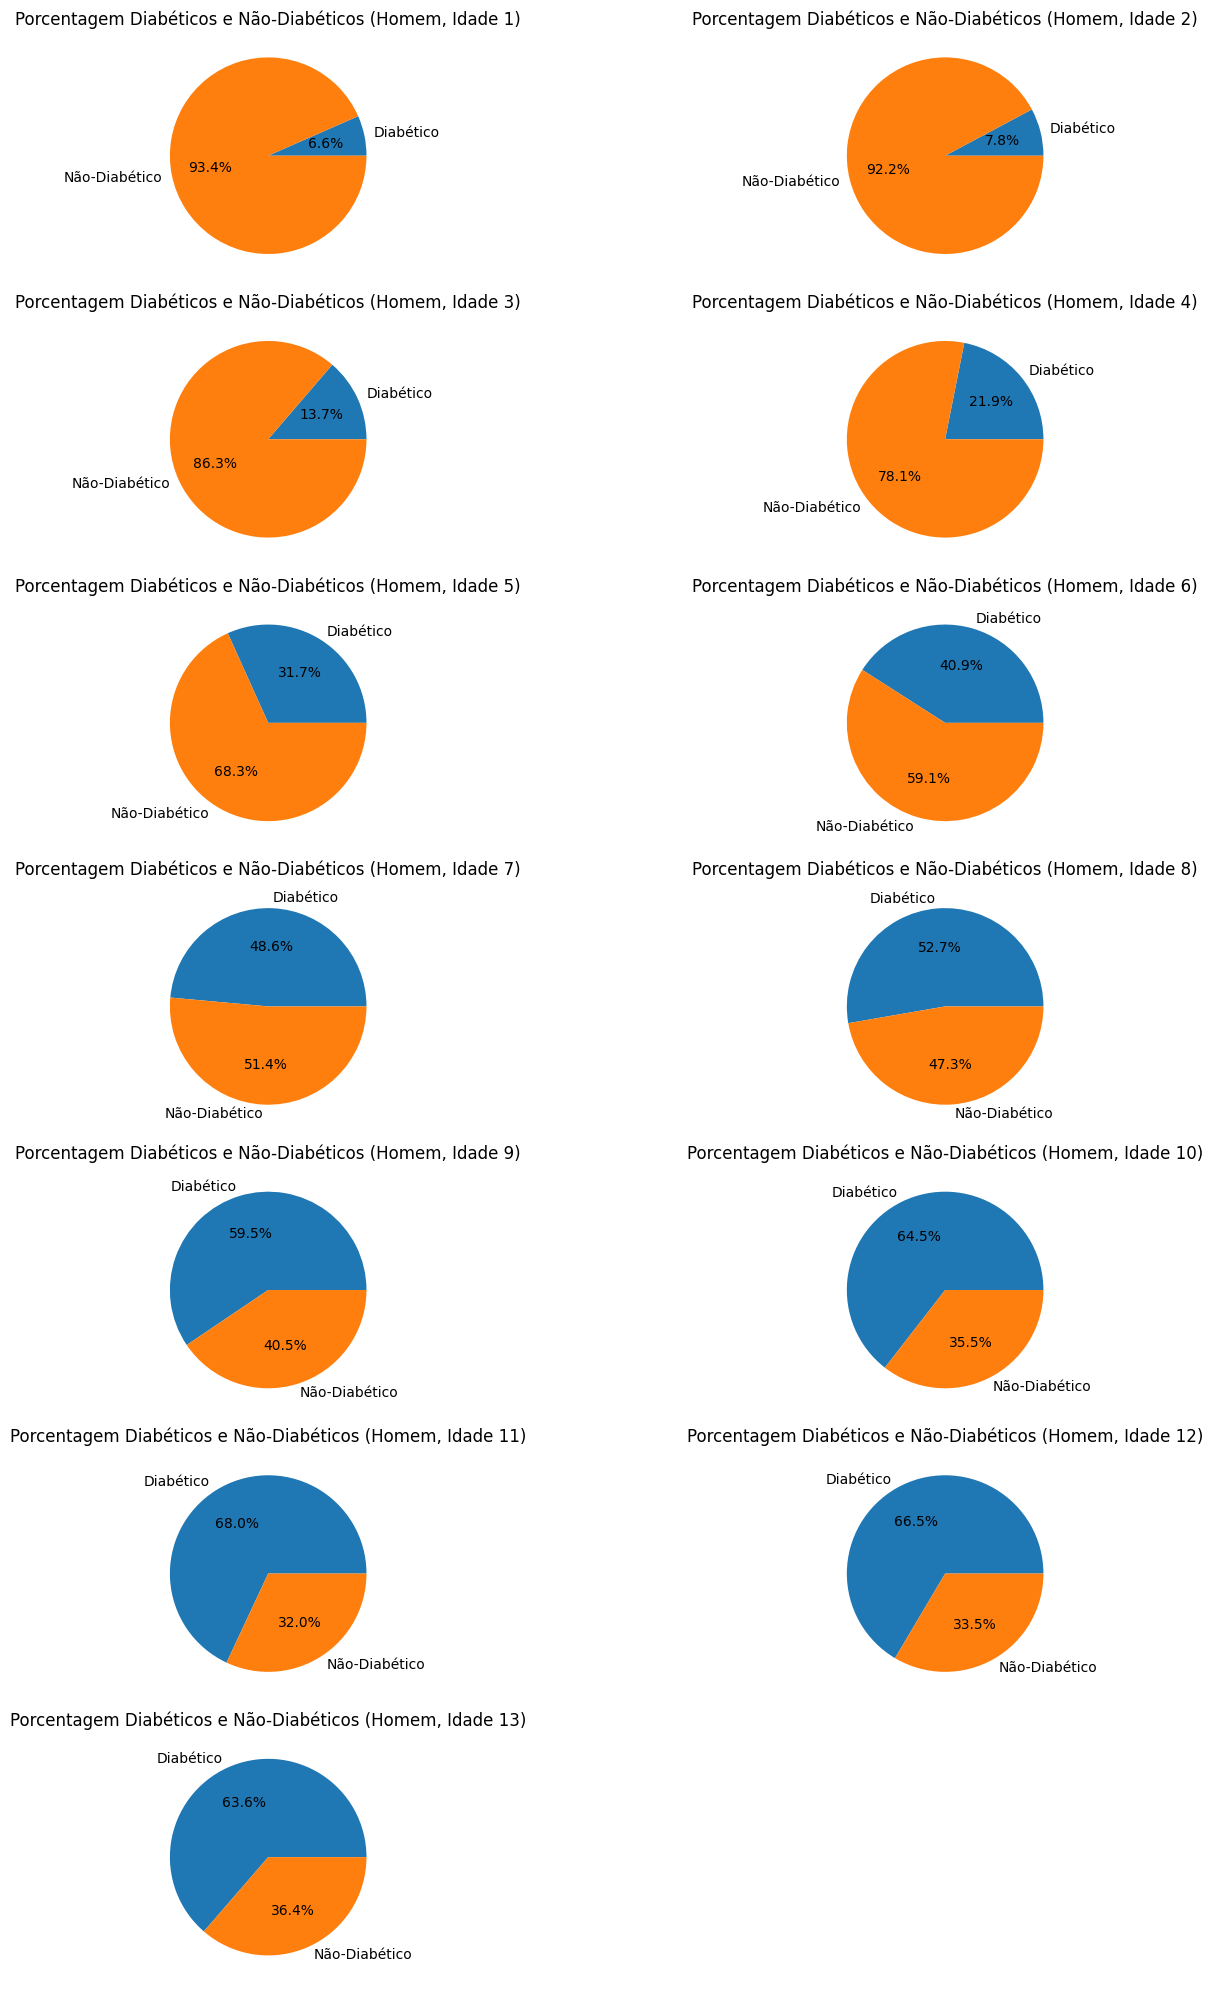

In [20]:
plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 1) & (data['Age'] == age)]
    total_male = len(df_female)
    diabetic_male = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_male = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
    plt.title(f'Porcentagem Diabéticos e Não-Diabéticos (Homem, Idade {age})')
plt.tight_layout()
plt.show()

### Frequência de diabetes em mulheres para diferentes idades

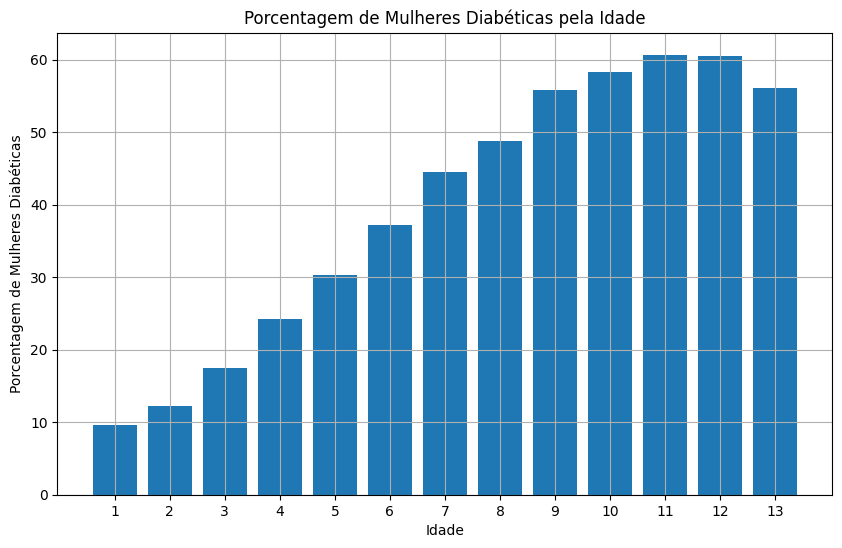

Percentual máximo de mulheres diabéticas é 60.71% na idade 11.


In [21]:
data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Idade')
plt.ylabel('Porcentagem de Mulheres Diabéticas')
plt.title('Porcentagem de Mulheres Diabéticas pela Idade')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Percentual máximo de mulheres diabéticas é {:.2f}% na idade {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

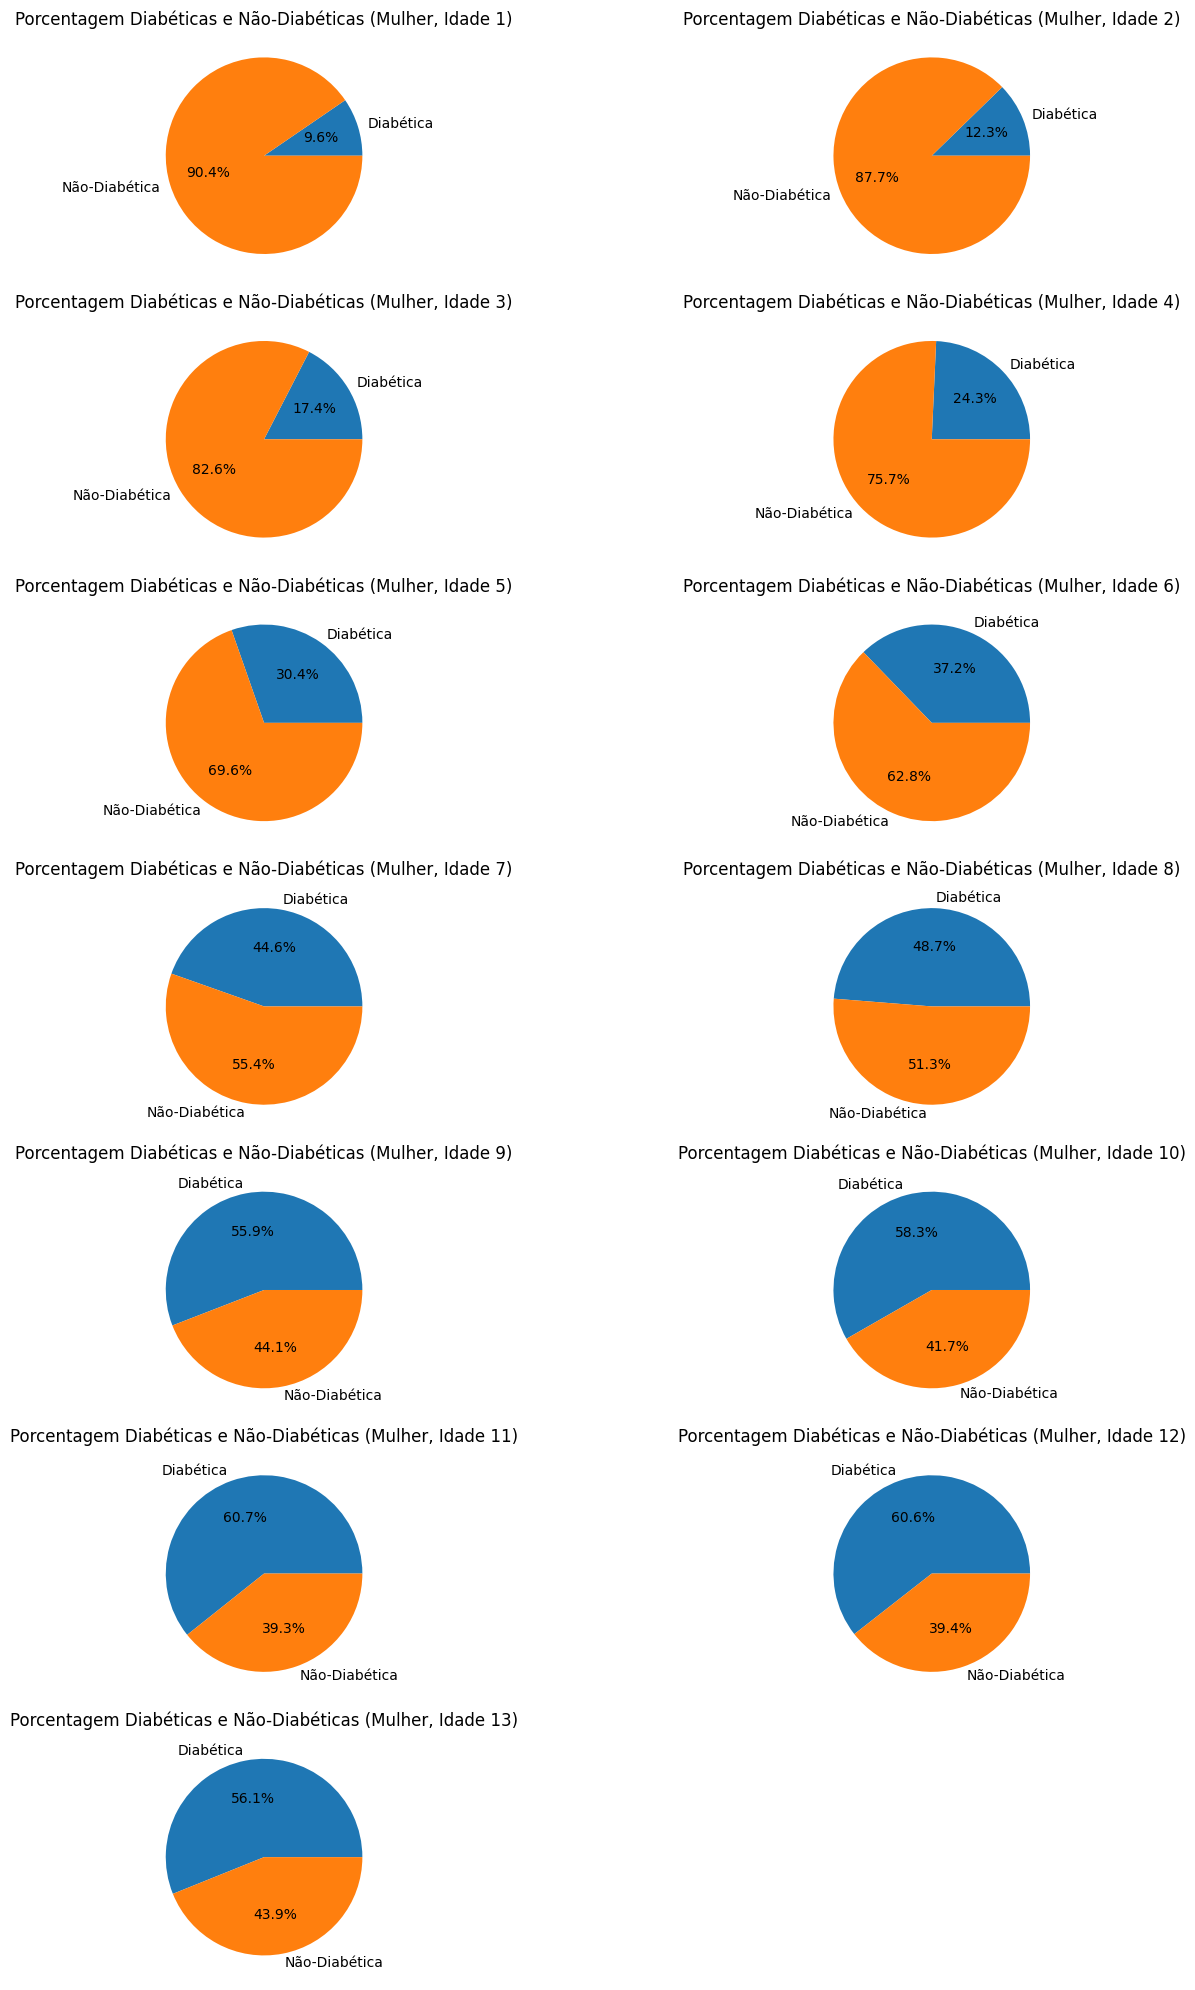

In [22]:
plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 0) & (data['Age'] == age)]
    total_female = len(df_female)
    diabetic_female = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_female = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_female, non_diabetic_female], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
    plt.title(f'Porcentagem Diabéticas e Não-Diabéticas (Mulher, Idade {age})')
plt.tight_layout()
plt.show()

### Relação IMC e Diabetes para Homens

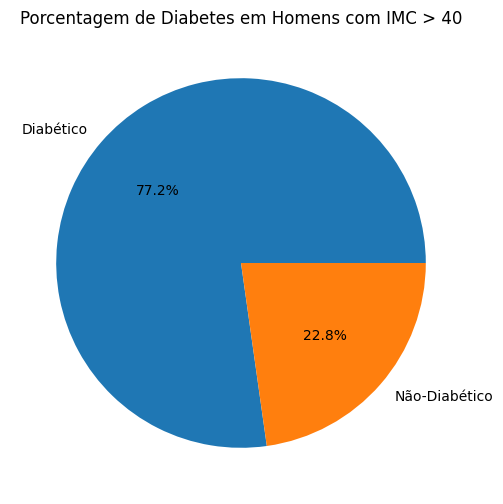

Porcentagem de Diabetes em Homens com IMC > 40: 77.2%


In [23]:

male_high_bmi = data[(data['Sex'] == 1) & (data['BMI'] > 40)]


total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100


plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Homens com IMC > 40')
plt.show()

print(f"Porcentagem de Diabetes em Homens com IMC > 40: {percent_diabetic:.1f}%")

### Relação IMC e Diabetes para Mulheres

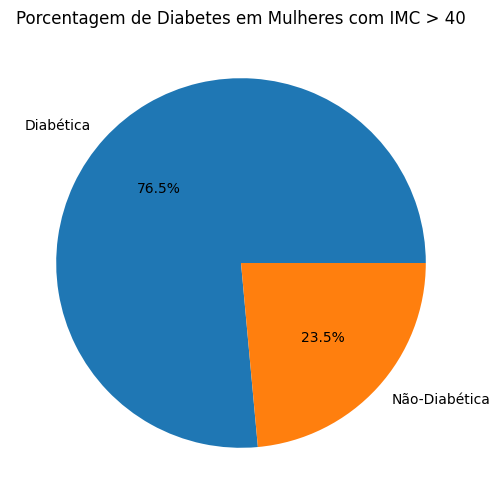

Porcentagem de Diabetes em Mulheres com IMC > 40 76.5%


In [24]:
female_high_bmi = data[(data['Sex'] == 0) & (data['BMI'] > 40)]


total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100


plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Mulheres com IMC > 40')
plt.show()

print(f"Porcentagem de Diabetes em Mulheres com IMC > 40 {percent_diabetic:.1f}%")

### Relação Renda e Diabetes para Homens e Mulheres

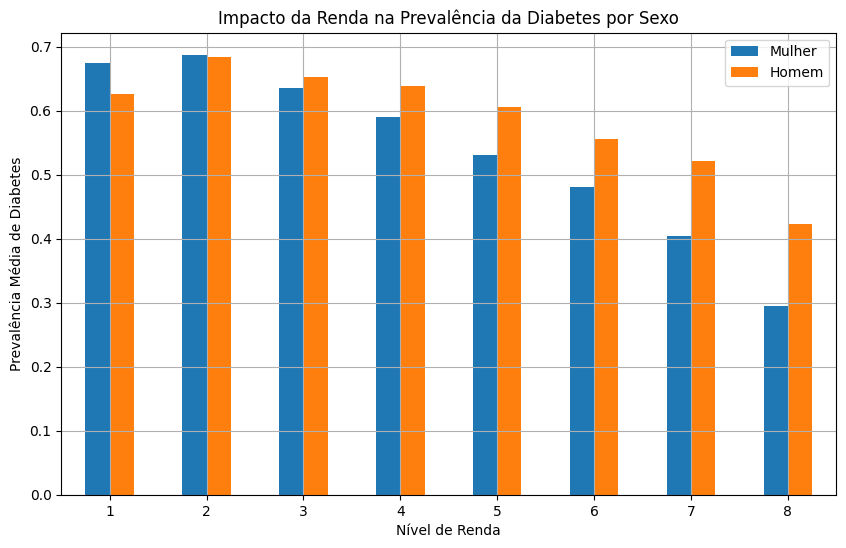

In [25]:
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()

income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Nível de Renda')
plt.ylabel('Prevalência Média de Diabetes')
plt.title('Impacto da Renda na Prevalência da Diabetes por Sexo')
plt.xticks(rotation=0)
plt.legend(['Mulher', 'Homem'])
plt.grid(True)
plt.show()

### Relação Educação e Diabetes para Homens e Mulheres

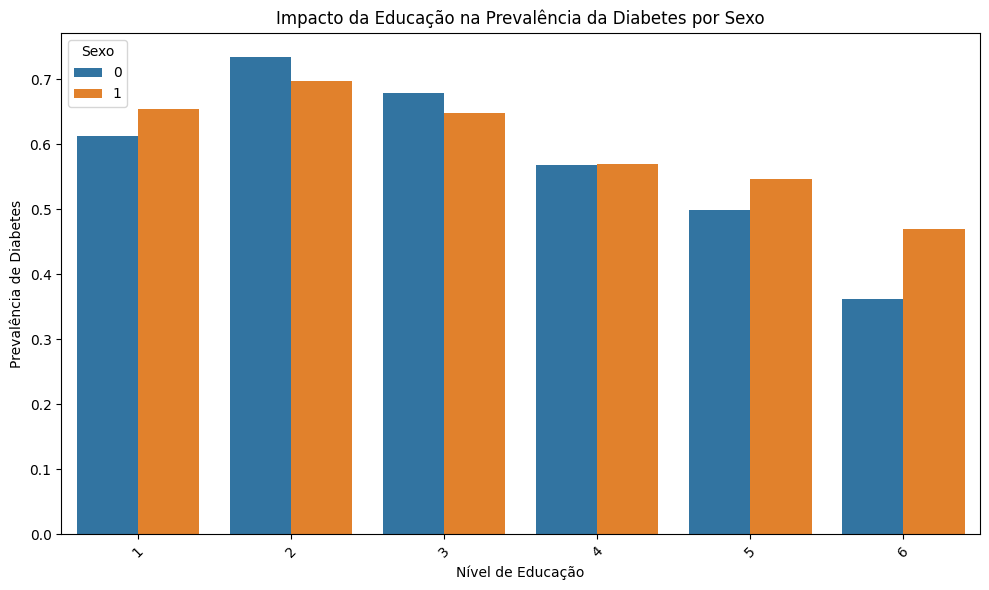

In [26]:
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Nível de Educação')
plt.ylabel('Prevalência de Diabetes')
plt.title('Impacto da Educação na Prevalência da Diabetes por Sexo')
plt.xticks(rotation=45)
plt.legend(title='Sexo', loc='upper left')
plt.tight_layout()
plt.show()

### O Impacto Percentual de Atividades Físicas em Diabéticos Para Homens e Mulheres

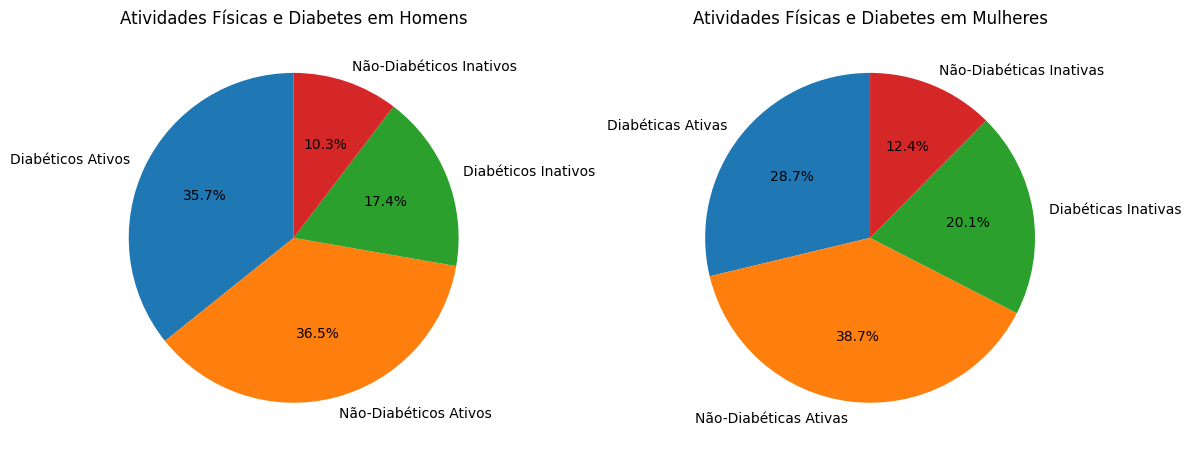

In [27]:
male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie([male_active_diabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_non_diabetics],
            labels=['Diabéticos Ativos', 'Não-Diabéticos Ativos', 'Diabéticos Inativos', 'Não-Diabéticos Inativos'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Atividades Físicas e Diabetes em Homens')

axes[1].pie([female_active_diabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_non_diabetics],
            labels=['Diabéticas Ativas', 'Não-Diabéticas Ativas', 'Diabéticas Inativas', 'Não-Diabéticas Inativas'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Atividades Físicas e Diabetes em Mulheres')

plt.tight_layout()
plt.show()

### O Impacto Percentual de Doenças Cardíacas em Diabéticos para Homens e Mulheres

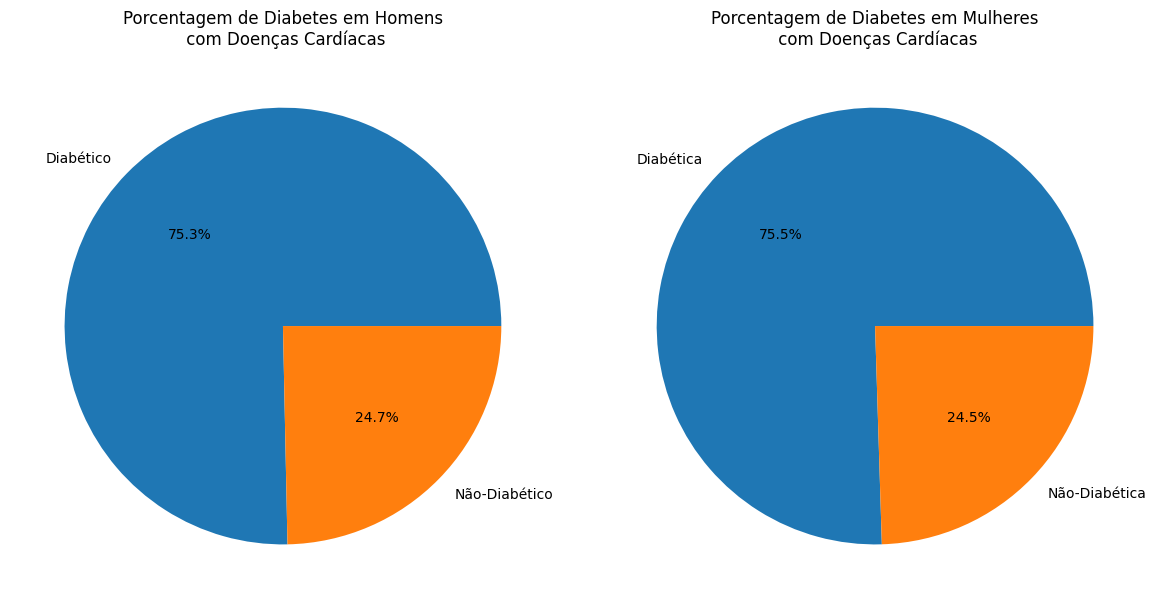

Porcentagem de Diabetes em Homens com Doenças Cardíacas: 75.3%
Porcentagem de Diabetes em Homens sem Doenças Cardíacas: 48.0%
Porcentagem de Diabetes em Mulheres com Doenças Cardíacas: 75.5%
Porcentagem de Diabetes em Mulheres sem Doenças Cardíacas: 45.3%


In [30]:
male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Homens\n com Doenças Cardíacas')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Mulheres\n com Doenças Cardíacas')

plt.tight_layout()
plt.show()

print(f"Porcentagem de Diabetes em Homens com Doenças Cardíacas: {male_hd_diabetic_percent:.1f}%")
print(f"Porcentagem de Diabetes em Homens sem Doenças Cardíacas: {male_nohd_diabetic_percent:.1f}%")
print(f"Porcentagem de Diabetes em Mulheres com Doenças Cardíacas: {female_hd_diabetic_percent:.1f}%")
print(f"Porcentagem de Diabetes em Mulheres sem Doenças Cardíacas: {female_nohd_diabetic_percent:.1f}%")


### O Impacto Percentual do AVC em Diabéticos para Homens e Mulheres

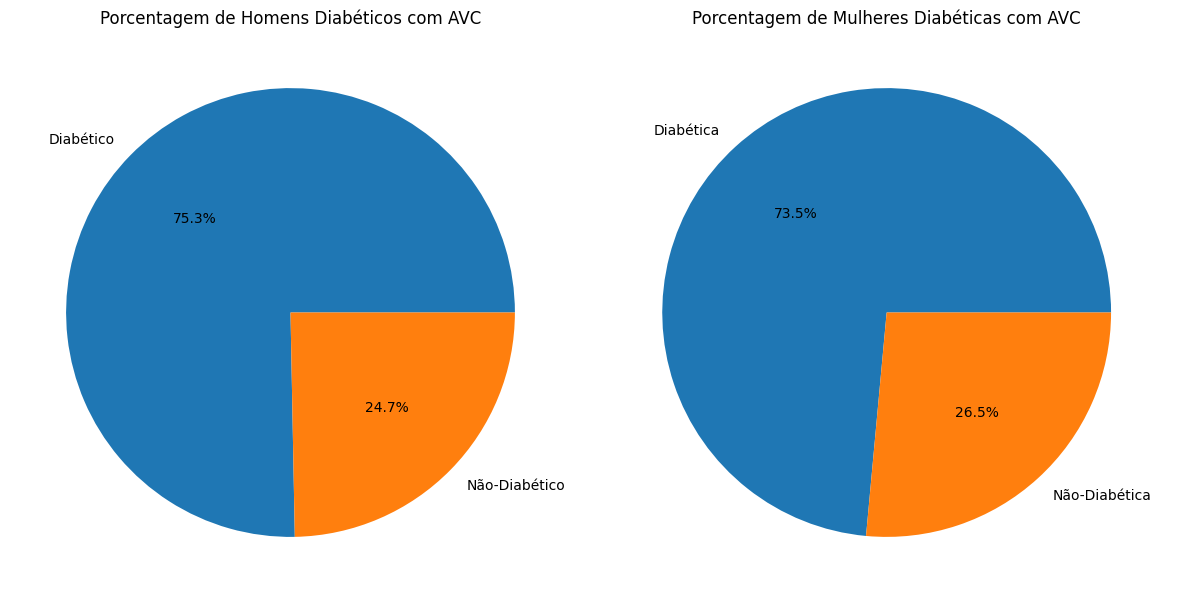

Porcentagem de Homens Diabéticos com AVC: 75.3%
Porcentagem de Mulheres Diabéticas com AVC: 73.5%


In [32]:

male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100


total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Homens Diabéticos com AVC')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Mulheres Diabéticas com AVC')

plt.tight_layout()
plt.show()

print(f"Porcentagem de Homens Diabéticos com AVC: {percent_diabetic_male_stroke:.1f}%")
print(f"Porcentagem de Mulheres Diabéticas com AVC: {percent_diabetic_female_stroke:.1f}%")

### O Impacto Percentual da Hipertensão em Diabéticos para Homens e Mulheres

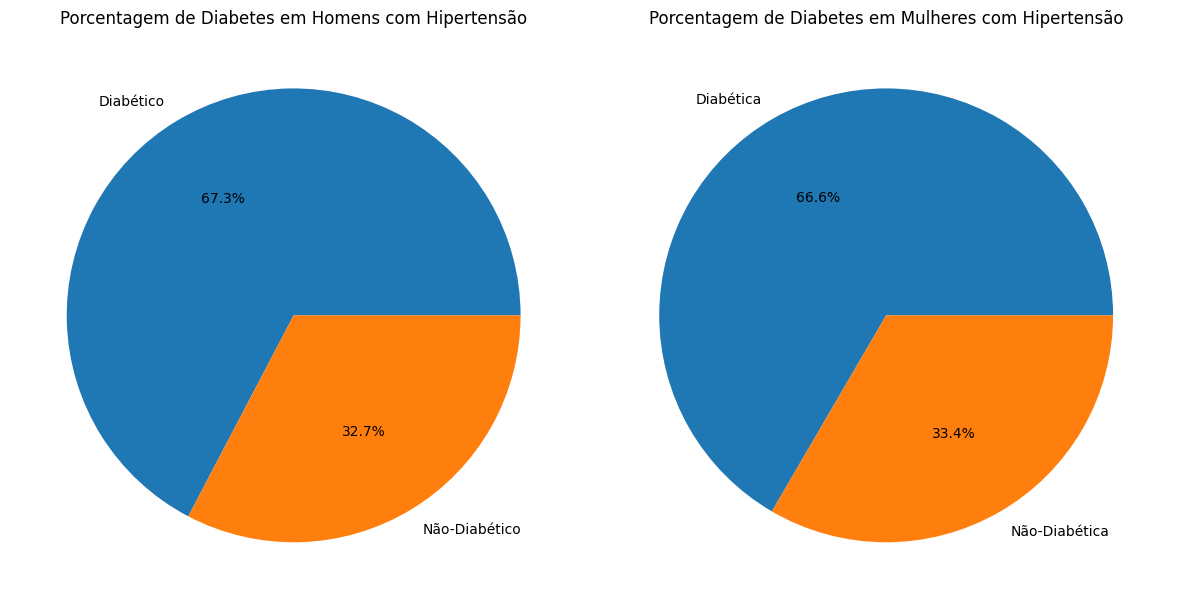

Porcentagem de Diabetes em Homens com Hipertensão: 67.3%
Porcentagem de Diabetes em Mulheres com Hipertensão: 66.6%


In [34]:
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Homens com Hipertensão')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Mulheres com Hipertensão')

plt.tight_layout()
plt.show()

print(f"Porcentagem de Diabetes em Homens com Hipertensão: {male_percent_diabetic:.1f}%")
print(f"Porcentagem de Diabetes em Mulheres com Hipertensão: {female_percent_diabetic:.1f}%")

### O impacto Percentual do Colesterol Alto em Diabéticos para Homens e Mulheres

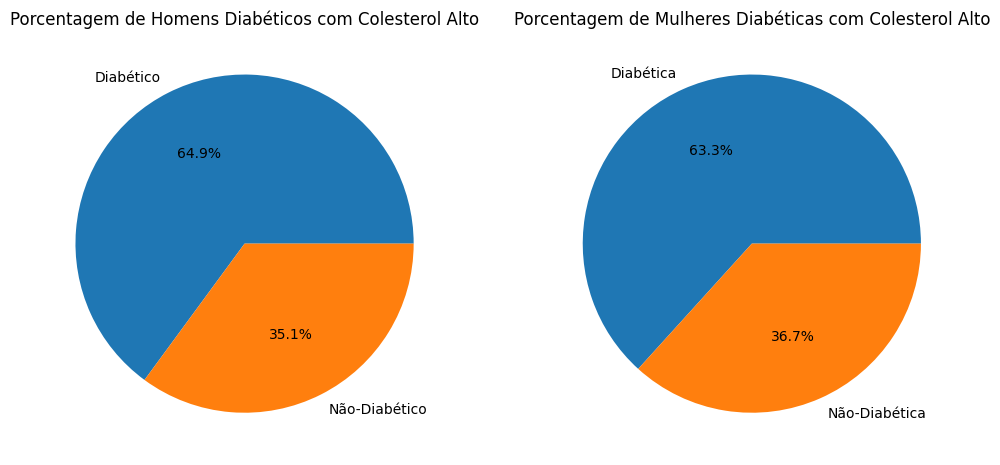

In [36]:
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 0)]

male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes'] == 1]) / len(female_no_highchol)) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Homens Diabéticos com Colesterol Alto')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Mulheres Diabéticas com Colesterol Alto')

plt.show()

### O impacto Percentual do Cigarro na Diabetes

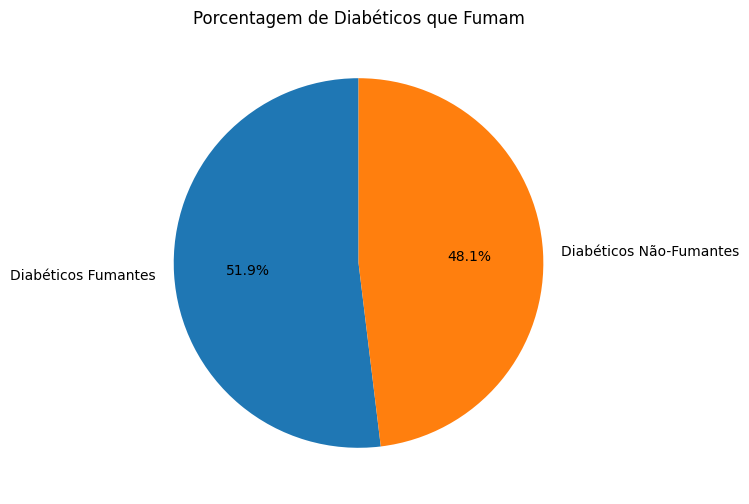

In [39]:
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Diabéticos Fumantes', 'Diabéticos Não-Fumantes']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Diabéticos que Fumam')
plt.show()